In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
# set sensible default parameters for matplotlib
plt.rcParams['figure.figsize'] = [9, 5]
plt.rcParams['figure.dpi'] = 120
plt.style.use('seaborn-pastel')


In [3]:
# load data
df = pd.read_csv('TED.csv')

In [4]:
df.head()

,video_link,thumbnail_link,duration,title,views,likes,comments,date,description
0,https://www.youtube.com//watch?v=B5smctuV7-Q,https://i.ytimg.com/vi/B5smctuV7-Q/hqdefault.jpg,"14 minutes, 48 seconds",We Can Make COVID-19 the Last Pandemic | Bill ...,"208,480",Like,NaN,22 Apr 2022,"Building a pandemic-free future won’t be easy,..."
1,https://www.youtube.com//watch?v=FrqBWQ-mVEc,https://i.ytimg.com/vi/FrqBWQ-mVEc/hqdefault.jpg,"9 minutes, 53 seconds",The Future Will Be Shaped by Optimists | Kevin...,"51,273",1.9K,262,21 Apr 2022,"""Every great and difficult thing has required ..."
2,https://www.youtube.com//watch?v=iIne-UO7wUo,https://i.ytimg.com/vi/iIne-UO7wUo/hqdefault.jpg,"9 minutes, 18 seconds",An Olympic Champion’s Unwavering Advocacy for ...,"25,597",Like,53,20 Apr 2022,Getting pregnant as a track and field athlete ...
3,https://www.youtube.com//watch?v=5T2VRY0LECc,https://i.ytimg.com/vi/5T2VRY0LECc/hqdefault.jpg,"6 minutes, 56 seconds",The African Swamp Protecting Earth's Environme...,"21,430",633,40,20 Apr 2022,The peatlands of Africa's Congo Basin are a va...
4,https://www.youtube.com//watch?v=YRvf00NooN8,https://i.ytimg.com/vi/YRvf00NooN8/hqdefault.jpg,"1 hour, 6 minutes, 25 seconds",Elon Musk: A future worth getting excited abou...,"3,609,893",95K,"8,757",18 Apr 2022,What's on Elon Musk's mind? In this exclusive ...


In [5]:
df.shape

(3923, 9)

In [6]:
# number of videos
len(df.title)

3923

In [7]:
# Check the types of features
df.dtypes

video_link        object
thumbnail_link    object
duration          object
title             object
views             object
likes             object
comments          object
date              object
description       object
dtype: object

In [8]:
# drop unneccessary features
df.drop(columns = ['description', 'thumbnail_link'], inplace=True)

In [9]:
# Check the NaNs
df.isnull().sum()

video_link     0
duration       0
title          3
views          3
likes          1
comments      67
date           3
dtype: int64

In [10]:
df[df['views'].isnull()]

# There two YouTube Shorts. I will drop them.
# Id 2352 I will add the values.

,video_link,duration,title,views,likes,comments,date
175,https://www.youtube.com//shorts/rXZrrBxFex0,Shorts,NaN,NaN,953,NaN,NaN
176,https://www.youtube.com//shorts/pzLQtHyIbJM,Shorts,NaN,NaN,633,NaN,NaN
2352,https://www.youtube.com//watch?v=QeAGu40vZzI,"9 minutes, 51 seconds",NaN,NaN,NaN,141,NaN


In [11]:
df = df.drop(df[df['duration'] == 'Shorts'].index)

In [12]:
df.loc[2352, 'title'] = 'Why good hackers make good citizens | Catherine Bracy'
df.loc[2352, 'views'] = '82,676'
df.loc[2352, 'likes'] = '1.1K'
df.loc[2352, 'date'] = '25 Feb 2014'

In [13]:
df['comments'].isnull().sum()

# These videos comments are restricted.

65

In [14]:
# Convert views to intergers.
#  I don't want comma on integer.
df['views'].replace(',','', regex=True, inplace=True)
df['comments'].replace(',','', regex=True, inplace=True)

In [15]:
# Convert to integer
df['views'] = pd.to_numeric(df['views'], errors='coerce')
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')

In [16]:
df.date.sort_values()
#the last values must be corrected.

3295                      1 Apr 2010
3293                      1 Apr 2010
3294                      1 Apr 2010
2568                      1 Apr 2013
2328                      1 Apr 2014
                    ...             
835                      9 Sept 2019
480                      9 Sept 2020
457     Streamed live on 10 Oct 2020
5       Streamed live on 14 Apr 2022
174     Streamed live on 30 Oct 2021
Name: date, Length: 3921, dtype: object

In [17]:
# delete 'Streamed live on' phrase
df.loc[457, 'date'] = '10 Oct 2020'
df.loc[5, 'date'] = '14 Apr 2022'
df.loc[174, 'date'] = '30 Oct 2021'

In [18]:
# convert to datetime
from datetime import datetime

df['date']= pd.to_datetime(df['date'])

In [19]:
df.likes.unique()[:10]

# In some of the videos the numbe of Likes do not appear. Fill with None

array(['Like', '1.9K', '633', '95K', '115K', '1.2K', '7.3K', '1.8K',
       '773', '592'], dtype=object)

In [20]:
df.likes[df['likes'] == "Like"].count()

#there are 75 videos whose like number is restricted

75

In [21]:
# replace LIKE with 0
df.likes.replace(['Like'], [0], inplace=True)

In [22]:
# There K and M in likes. Convert to integer.
df.likes = (df.likes.replace(r'[KM]+$', '', regex=True).astype(float) * df.likes.str.extract(r'[\d\.]+([KM]+)',expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

In [23]:
# convert duration to seconds
df['duration'] = df['duration'].apply(pd.Timedelta).dt.total_seconds().astype(int)

In [24]:
df['duration'].sum()

3161354

In [25]:
# change the type of date
df['year'] = pd.DatetimeIndex(df['date']).year

In [26]:
# Total number of views
df['views'].sum()

2296284060

In [27]:
df["percentage"] = (df['views']*100) / (df['views'].sum())

In [28]:
conditions = [
    (df['views'] <= 10000),
    (df['views'] < 50000),
    (df['views'] < 100000),
    (df['views'] < 250000),
    (df['views'] < 500000),
    (df['views'] < 1000000),
    (df['views'] < 5000000),
    (df['views'] < 10000000),
    (df['views'] < 20000000),
    (df['views'] > 20000000)]

# create a list of the values we want to assign for each condition
values = ['< 10,000', '< 50,000', '< 100,000', '< 250,000','< 500,000', '< 1,000,000', '< 5,000,000', '< 10,000,000','< 20,000,000', '> 20,000,000']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier'] = np.select(conditions, values)


In [29]:
df.sort_values(by='percentage', ascending=False).head(50)

,video_link,duration,title,views,likes,comments,date,year,percentage,tier
1826,https://www.youtube.com//watch?v=arj7oStGLkU,844,Tim Urban: Inside the mind of a master procras...,47561789,1600000.0,76779.0,2016-04-06,2016,2.071250,"> 20,000,000"
2086,https://www.youtube.com//watch?v=6Af6b_wyiwI,517,Bill Gates: The next outbreak? We’re not ready...,36479188,729000.0,127586.0,2015-04-03,2015,1.588618,"> 20,000,000"
2261,https://www.youtube.com//watch?v=eIho2S0ZahI,599,How to speak so that people want to listen | J...,33137646,645000.0,9421.0,2014-06-27,2014,1.443099,"> 20,000,000"
2488,https://www.youtube.com//watch?v=DFjIi2hxxf0,702,Tom Thum: The orchestra in my mouth | TED,32442100,726000.0,19262.0,2013-07-19,2013,1.412809,"> 20,000,000"
2618,https://www.youtube.com//watch?v=KM4Xe6Dlp0Y,578,"Looks aren't everything. Believe me, I'm a mod...",28350484,482000.0,25510.0,2013-01-16,2013,1.234624,"> 20,000,000"
2459,https://www.youtube.com//watch?v=GZGY0wPAnus,528,The art of misdirection | Apollo Robbins,24889912,495000.0,12586.0,2013-09-13,2013,1.083921,"> 20,000,000"
1566,https://www.youtube.com//watch?v=zIwLWfaAg-8,2451,Elon Musk: The future we're building -- and bo...,23384534,364000.0,25094.0,2017-05-03,2017,1.018364,"> 20,000,000"
2717,https://www.youtube.com//watch?v=xYemnKEKx0c,1082,Strange answers to the psychopath test | Jon R...,23158804,448000.0,23597.0,2012-08-15,2012,1.008534,"> 20,000,000"
1876,https://www.youtube.com//watch?v=8KkKuTCFvzI,767,Robert Waldinger: What makes a good life? Less...,22579115,419000.0,10765.0,2016-01-25,2016,0.983289,"> 20,000,000"
2921,https://www.youtube.com//watch?v=P_6vDLq64gE,1131,How to spot a liar | Pamela Meyer,22028834,221000.0,15572.0,2011-10-14,2011,0.959325,"> 20,000,000"


## Plots

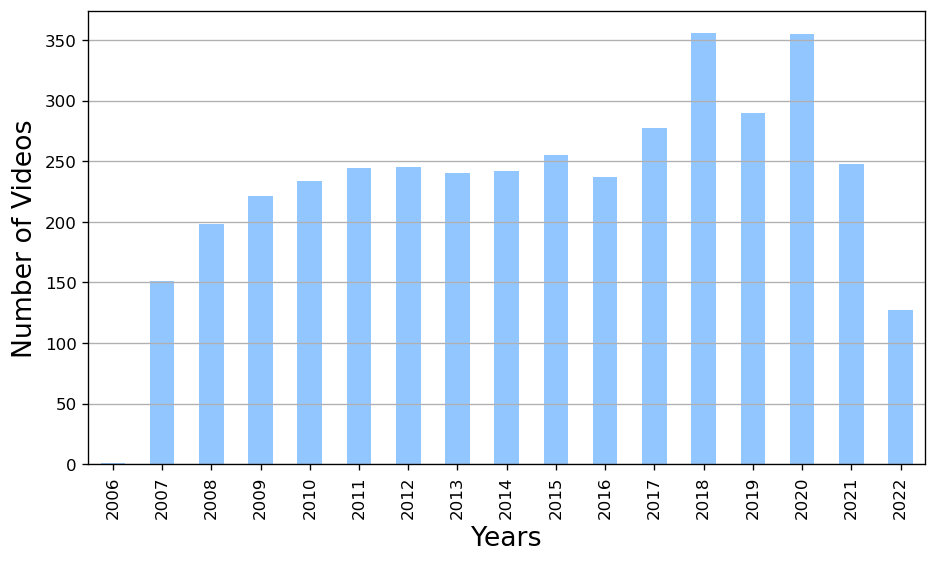

In [31]:
df.groupby(by='year').count().title.plot.bar()
plt.xlabel('Years', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
ax = plt.gca()
ax.yaxis.grid(True)

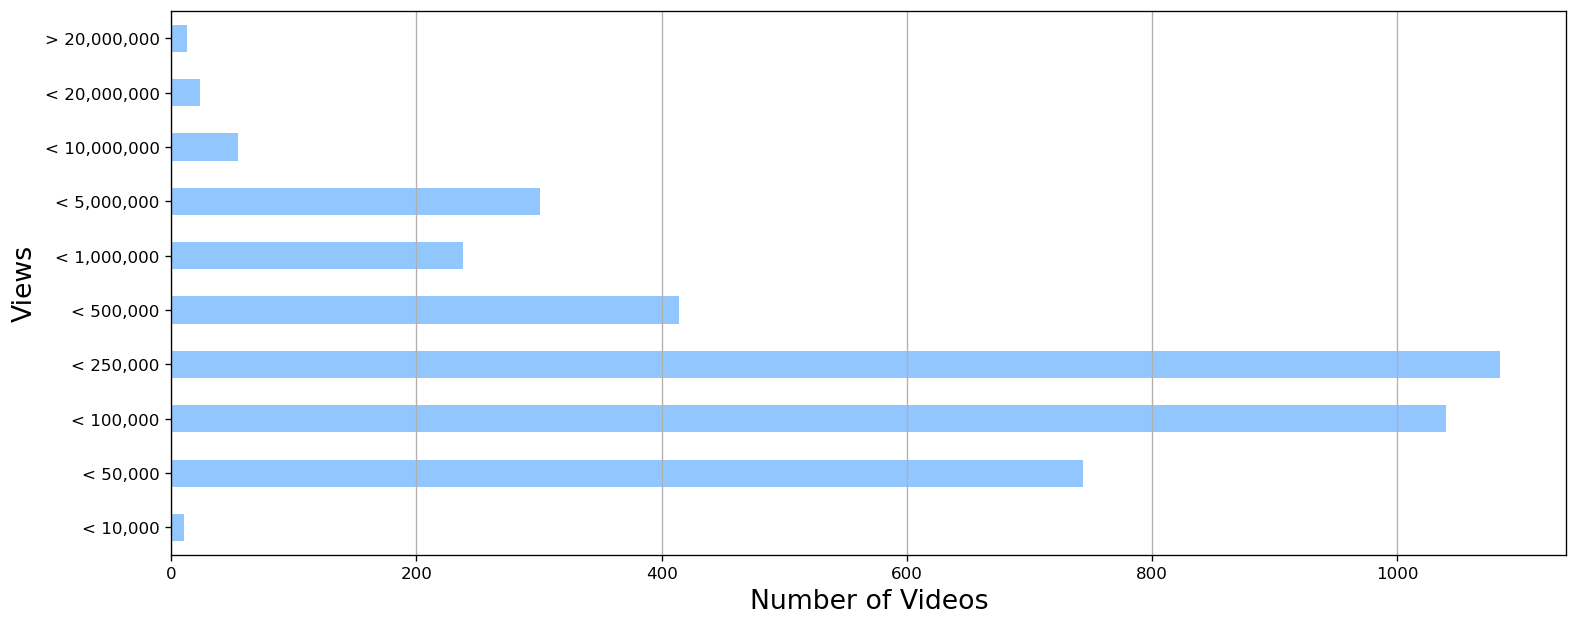

In [32]:
fig = plt.figure(figsize=(15, 6))
df.tier.value_counts().loc[values].plot.barh()
plt.xlabel('Number of Videos', fontsize=16)
plt.ylabel('Views', fontsize=16)
ax = plt.gca()
ax.xaxis.grid(True)

In [33]:
table=df.groupby(by='tier').apply(lambda x: pd.Series({'freq': x['title'].count(), 'sum': x['percentage'].sum()}))

In [34]:
df.tier.value_counts()

< 250,000       1084
< 100,000       1040
< 50,000         744
< 500,000        414
< 5,000,000      301
< 1,000,000      238
< 10,000,000      54
< 20,000,000      23
> 20,000,000      13
< 10,000          10
Name: tier, dtype: int64

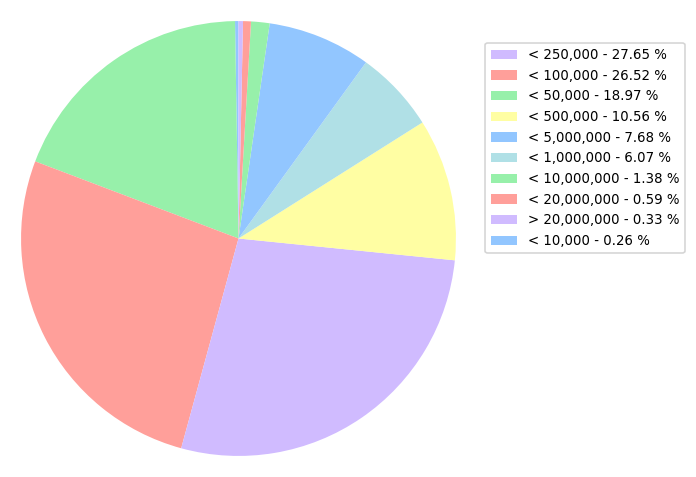

In [35]:
x = np.char.array(['< 10,000','< 50,000','< 100,000', '< 250,000', '< 500,000',
 '< 1,000,000','< 5,000,000','< 10,000,000','< 20,000,000','> 20,000,000'])
y = np.array([10, 744, 1040, 1084, 414, 238, 301, 54, 23, 13])
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y,  startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='right', bbox_to_anchor=(1.5, .7),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')


I don't use this pie chart as it has so many parts. It seems confusing. Combiing some group reduce the number of parts.

In [49]:
# create new column for new groups
conditions = [
    (df['views'] < 50000),
    (df['views'] < 100000),
    (df['views'] < 250000),
    (df['views'] < 500000),
    (df['views'] < 1000000),
    (df['views'] > 1000000)]

# create a list of the values we want to assign for each condition
values = ['< 50,000', '< 100,000', '< 250,000','< 500,000', '< 1,000,000', '> 1,000,000']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier2'] = np.select(conditions, values)

In [50]:
df.tier2.value_counts()

< 250,000      1084
< 100,000      1040
< 50,000        754
< 500,000       414
> 1,000,000     391
< 1,000,000     238
Name: tier2, dtype: int64

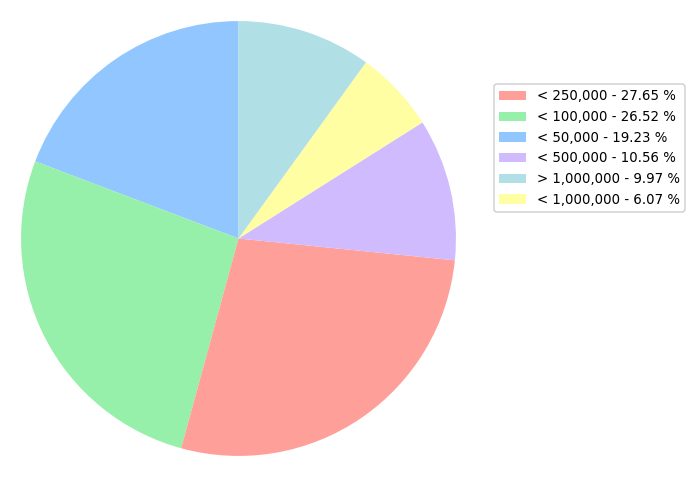

In [51]:
x = np.char.array(['< 50,000','< 100,000', '< 250,000', '< 500,000',
 '< 1,000,000','> 1,000,000'])
y = np.array([754, 1040, 1084, 414, 238, 391])
porcent = 100.*y/y.sum()

patches, texts = plt.pie(y,  startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='right', bbox_to_anchor=(1.5, .7),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')

In [39]:
df_10 = df.sort_values(by='percentage', ascending=False).head(10)

/var/folders/vn/0bh10gqd3yv9tlk1xg3jdzcr0000gn/T/ipykernel_66931/3939870445.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(['0', '10M','20M', '30M', '40M'])


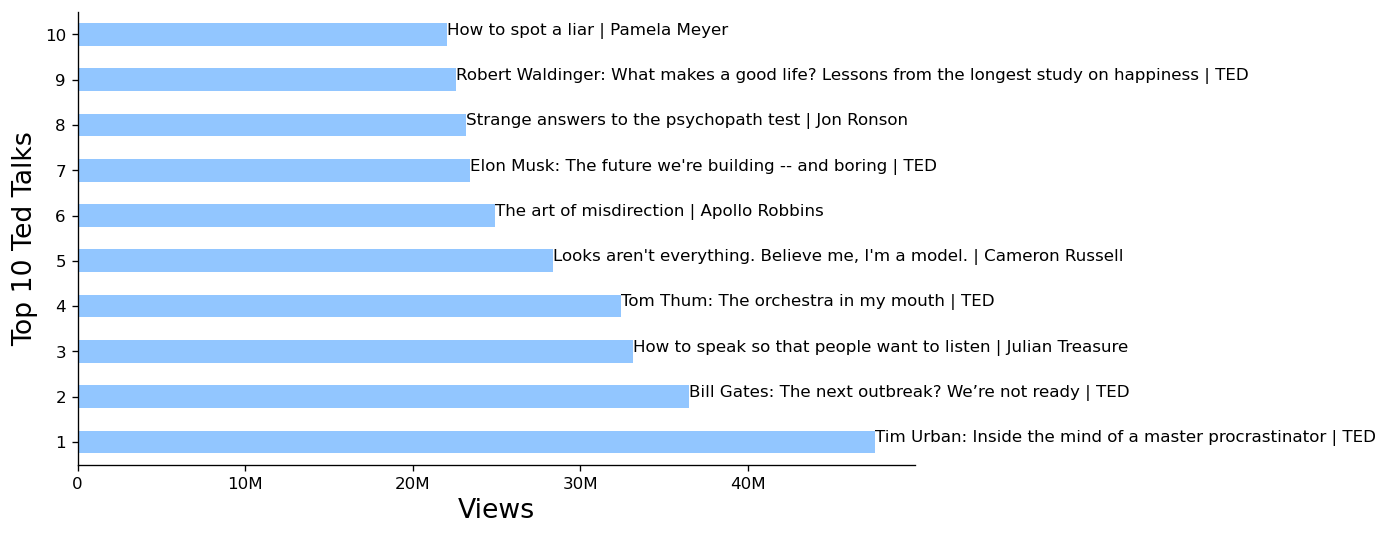

In [40]:
axes = df_10.views.plot.barh()
# add title of videos
x= df_10.views.to_list()
y= [0, 1,2,3,4,5,6,7,8,9,10]
text = df_10.title.to_list()
for x, y, p in zip(x, y, text):
   plt.text(x, y, p)

axes.set_xticklabels(['0', '10M','20M', '30M', '40M'])
axes.set_yticklabels(['1', '2','3','4','5','6','7','8','9','10'])
plt.xlabel('Views', fontsize=16)
plt.ylabel('Top 10 Ted Talks', fontsize=16)

# Hide the right and top spines
axes.spines.right.set_visible(False)
axes.spines.top.set_visible(False)
plt.show()

